# Exploratory notebook

    @Josefina Dalla Via

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

##### Import requested packages

In [145]:
import pandas as pd
import os
import shutil
import matplotlib.pyplot as plt 

pd.set_option('display.max_columns', None)  
from thesis_lib.data_processing import *
from thesis_lib.visual import *
import warnings
warnings.filterwarnings('ignore')

### Read data from csv

In [2]:
db = get_database('data')

cirugias


/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2850: DtypeWarning: Columns (74,77) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


labos


/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2850: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


images
sectores
ingresos_sectores
internaciones


/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2850: DtypeWarning: Columns (24,43,56,57) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [3]:
print('Available data:')
for i,table in enumerate(db.keys()):
    print(i+1,table)
    #print(db[table].columns)
    #print(db[table].info())
    

Available data:
1 cirugias
2 labos
3 images
4 sectores
5 ingresos_sectores
6 internaciones


## 1) Sectores

This dataset contains information of the different Sectors in which the hospital is organized. 

Total no. of sectors is 36. 

Each sector has a code consisting of 3 characters which identifies it. 

Sectores are grouped into 16 'Sector Types'. A list of the different Sector types is presented below

##### Sample view of the sectors df 

In [4]:
sectores= db['sectores']

In [5]:
sectores.head()

,CodSector,NombreSector,TipoSector
0,ACV,UNIDAD DE ACV,Unidad de ACV
1,CEG,CUIDADOS ESPEC. EN OBSERVACION,Cuidados especiales Guardia
2,CO3,CORDOBA 3 (INT.GRAL),CORDOBA - Internacion General
3,CO4,CORDOBA 4 (INT.GRAL),CORDOBA - Internacion General
4,CO5,CORDOBA 5 (INT.GRAL),CORDOBA - Internacion General


##### No. of sectors: 

In [6]:
print(str(len(sectores.CodSector.unique())))

36


##### List of Existing sectors and its codes

In [7]:
sectores[['NombreSector','CodSector']]

,NombreSector,CodSector
0,UNIDAD DE ACV,ACV
1,CUIDADOS ESPEC. EN OBSERVACION,CEG
2,CORDOBA 3 (INT.GRAL),CO3
3,CORDOBA 4 (INT.GRAL),CO4
4,CORDOBA 5 (INT.GRAL),CO5
5,CORDOBA 6 (INT.GRAL),CO6
6,CORDOBA 7 (INT. GRAL),CO7
7,CORDOBA 8 (INT. GRAL),CO8
8,EMERGENCIAS - CEG,EME
9,HEMOTERAPIA 4 SS TORRE,H10


##### No. of Sector Types

In [8]:
len(sectores.TipoSector.unique())

16

##### Number of Sectors grouped by Sector Type

In [9]:
sectores.groupby('TipoSector')['NombreSector'].count()

TipoSector
(No Agrupado)                       1
CORDOBA - Internacion General       6
Cuidados especiales Guardia         1
Emergencias                         1
Hemoterapia                         1
Internacion Conjunta                1
Internacion Quirurgica Breve        1
Neonatologia                        1
Pediatria                           1
Pre-Partos                          1
TORRE - Internacion general        11
Terapia intensiva                   4
Terapia pediatrica                  2
Unidad Paciente Critico Cronico     1
Unidad coronaria                    2
Unidad de ACV                       1
Name: NombreSector, dtype: int64

##### Sectors Structure

In [10]:
sectors_groups = sectores.groupby(by=['TipoSector','NombreSector']).describe()['CodSector']['top']
pd.DataFrame(sectors_groups)

top
TipoSector                      NombreSector                       
(No Agrupado)                   PLANTA QUIRURGICA               PQU
CORDOBA - Internacion General   CORDOBA 3 (INT.GRAL)            CO3
                                CORDOBA 4 (INT.GRAL)            CO4
                                CORDOBA 5 (INT.GRAL)            CO5
                                CORDOBA 6 (INT.GRAL)            CO6
                                CORDOBA 7 (INT. GRAL)           CO7
                                CORDOBA 8  (INT. GRAL)          CO8
Cuidados especiales Guardia     CUIDADOS ESPEC. EN OBSERVACION  CEG
Emergencias                     EMERGENCIAS - CEG               EME
Hemoterapia                     HEMOTERAPIA 4 SS TORRE          H10
Internacion Conjunta            INTERNACION CONJUNTA            NUR
Internacion Quirurgica Breve    INT. QUIRURGICA BREVE           IQB
Neonatologia                    TORRE 6 (NEONATOL)              NNT
Pediatria                       TORRE 9 (PED)                   PED
Pre-Partos                      PREPARTO                        PRP
TORRE - Internacion general     TORRE 10 (INT.GRAL)             T10
                                TORRE 11 (INT.GRAL)             T11
                                TORRE 12 (INT.GRAL)             T12
                                TORRE 13 (INT. GRAL.)           T13
                                TORRE 14 (INT.GRAL.)            T14
                                TORRE 15 (INT.GRAL)             T15
                                TORRE 16 (INT.GRAL.-ONCOHEMAT)  T16
                                TORRE 17 (INT.GRAL)             T17
                                TORRE 18 (INT.GRAL)             T18
                                TORRE 19 (INT.GRAL)             T19
                                TORRE 9                         T09
Terapia intensiva               CUIDADOS INTENSIVOS I SECTOR1   UC1
                                CUIDADOS INTENSIVOS I SECTOR2   UC2
                                CUIDADOS INTENSIVOS I SECTOR3   UC3
                                CUIDADOS INTENSIVOS I SECTOR4   UC4
Terapia pediatrica              TORRE 8 (TER. PED)              TEP
                                TORRE 8 (TER.INTERM.PED)        TIP
Unidad Paciente Critico Cronico UNIDAD PACIENTE CRITICO CRONIC  UCR
Unidad coronaria                UNIDAD CORONARIA I              UC6
                                UNIDAD CORONARIA II             UCO
Unidad de ACV                   UNIDAD DE ACV                   ACV

## 2) Internaciones

This dataset contains information corresponding to all hospitalizations ocurred between January 2017 - October 2019. 

Each row represents a hospitalization identified by a unique admission number ('NroAdmisión). 

Patients are identified by a patient id ('Nro H.C.).
During his clinic history a patient can have 0 , 1 or more hospitalizations (and then admission numbers) but only one patient id. 

In [3]:
internaciones = db['internaciones']

##### Sample view of the 'internaciones' df

In [12]:
internaciones.head()

,Nro Adm,Nro H.C.,Edad,Sexo,Fec Nac,Entidad,AgrupEntidad,Fec Adm,Hora Adm,AñoAdm,MesAdm,Procedencia,Médico Admisión,SecAdmisión,SecUltimo,CategUlt,Aislación,HabitUlt,CamaUlt,Fec Alta,Hora Alta,AñoAlta,MesAlta,Motivo Alta,PreAlta,1erSecInt,Diagnóstico Administrativo No Codificado,CodDiagPresu,Diagnóstico Presuntivo,CodCieDiagEgr,Diagnóstico Egreso,FecDenunEgre,HoraDenunEgre,Médico Denuncia Egreso,Epicrisis,MédicoEpicrisis,Quirurg,CaderaExpress,Permanencia,Servicio Responsable,Servicio Co-Responsable,FecHorIngGua,Prest.Guardia,Prestac.Guardia,Reingreso,AdmAntReciente,FecAdmAntReciente,FecAltaAntReciente,SecAntReciente,Diagn. Egreso Admisión Anterior Reciente,AmbulanciaEgreso,PesoAlNacer,EdadGestac,PIM2TEP,DiagAltoRiesgoTEP,DiagBajoRiesgoTEP,ARM_TEP,CEC_TEP,SolicDerivación,OrigDerivación,Procedencia.1,DiagnósticoDerivación,AreaDerivación,Notificado,UsuarioDeriv
0,466470-1,3526141-4,79,F,1937-11-15,PAMI UGL VI,PAMI,2017-01-01,02:42:00,2017,Ene,Emergencias,VEDIA VARGAS ANICETA,EME,T16,C,NaN,1634,2,2017-01-04,18:17:00,2017.0,Ene,Alta Medica,NaN,T16,DESHIDRATACION,XX2,No Especifica Codigo,276.51,Deshidratacion,2017-01-04,16:47:41,SIMONE MILENA,Sí,SIMONE MILENA,No,No,3,CLINICA MEDICA,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,Sí,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,466471-4,3714597-2,74,F,1942-09-13,PAMI UGL VI,PAMI,2017-01-01,02:48:00,2017,Ene,Emergencias,VEDIA VARGAS ANICETA,EME,UC6,A,*,702,1,2017-01-07,14:03:00,2017.0,Ene,Alta Medica,NaN,UCO,DIF RESPIRATORIA,XX2,No Especifica Codigo,401.9,Hipertension Arterial No Especificada,2017-01-07,13:42:01,GIARROCCO AGUSTINA,Sí,GIARROCCO AGUSTINA,No,No,6,CARDIOLOGIA ADULTOS,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,466472-7,3714595-2,27,F,1989-11-08,MEDICUS,PREPAGA,2017-01-01,02:46:00,2017,Ene,Guardia,QUIROZ CARINA MAGDALENA,T10,T10,C,NaN,1020,1,2017-01-01,19:54:00,2017.0,Ene,Alta Medica,NaN,T10,ABORTO ESPONTANEO,XX2,No Especifica Codigo,634,Aborto Espontaneo,2017-01-01,19:30:56,ABADIA MICAELA,Sí,ABADIA MICAELA,Sí,No,1,OBSTETRICIA,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,466473-0,3672378-8,85,F,1931-08-09,OSUTHGRA O.S PERSONAL GASTRONOMICO,BRISTOL,2017-01-01,03:55:00,2017,Ene,Emergencias,VEDIA VARGAS ANICETA,EME,T12,C,NaN,1236,1,2017-01-04,14:58:00,2017.0,Ene,Alta Medica,NaN,T12,OCLUSION INTESTINAL,789.00,Dolor Abdominal Sitio Inespecificado,620.2,Otros Quistes Ovaricos Y Quister Ovaricos Neom,2017-01-04,14:25:44,CHAVEZ MORA JORGE MARIO,Sí,CHAVEZ MORA JORGE MARIO,No,No,3,CLINICA MEDICA,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42736.059525,MESA OPERATIVA,DOM,OCLUSION INTESTINAL,INTERNACION GENERAL,SUP,ABLANCO
4,466474-3,3714598-2,34,F,1982-04-06,OSDE,PREPAGA,2017-01-01,05:07:00,2017,Ene,Emergencias,CANIS DIEGO DAMIAN,EME,EME,I,NaN,6,1,2017-01-01,09:01:00,2017.0,Ene,Alta Medica,NaN,EME,INTOX. ALCOHOLICA,XX2,No Especifica Codigo,94.68,Desintoxicacion Combinada De Alcohol Y Drogas,2017-01-01,09:01:03,PUENTE MOSQUERA KAROLA,Sí,PUENTE MOSQUERA KAROLA,No,No,1,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42736.195347,ANDREA,DOMICILIO,INTOX. ALCOHOLICA,INTERNACION GENERAL,NaN,ABLANCO


For each hospitalization, the following data is available:

##### Available variables

In [13]:
for i in internaciones.columns:
    print(i)

Nro Adm
Nro H.C.
Edad
Sexo
Fec Nac
Entidad
AgrupEntidad
Fec Adm
Hora Adm
AñoAdm
MesAdm
Procedencia
Médico Admisión
SecAdmisión
SecUltimo
CategUlt
Aislación
HabitUlt
CamaUlt
Fec Alta
Hora Alta
AñoAlta
MesAlta
Motivo Alta
PreAlta
1erSecInt
Diagnóstico Administrativo No Codificado
CodDiagPresu
Diagnóstico Presuntivo
CodCieDiagEgr
Diagnóstico Egreso
FecDenunEgre
HoraDenunEgre
Médico Denuncia Egreso
Epicrisis
MédicoEpicrisis
Quirurg
CaderaExpress
Permanencia
Servicio Responsable
Servicio Co-Responsable
FecHorIngGua
Prest.Guardia
Prestac.Guardia
Reingreso
AdmAntReciente
FecAdmAntReciente
FecAltaAntReciente
SecAntReciente
Diagn. Egreso Admisión Anterior Reciente
AmbulanciaEgreso
PesoAlNacer
EdadGestac
PIM2TEP
DiagAltoRiesgoTEP
DiagBajoRiesgoTEP
ARM_TEP
CEC_TEP
SolicDerivación
OrigDerivación
Procedencia.1
DiagnósticoDerivación
AreaDerivación
Notificado
UsuarioDeriv


### 2.1  Basic stats

##### Total No. of hospitalizations

In [14]:
print(internaciones['Nro Adm'].count())
#Safety check for duplicates
if (internaciones['Nro Adm'].count() != internaciones['Nro Adm'].nunique()):
    print('Warning: There are duplicate rows for hospitalizations')

88256


##### Total No. of patients hospitalized

In [15]:
print(internaciones['Nro H.C.'].nunique())

64507


###### Avg. hospitalizacions per patient:

In [16]:
internaciones[['Nro Adm']].count()[0]/internaciones[['Nro H.C.']].nunique()[0]

1.3681615948656736

##### Days of data

In [17]:
internaciones['Fec Adm'].nunique()

1045

##### Period of time

In [18]:
print('from: ' +str(internaciones['Fec Adm'].min()))
print('to: '+str(internaciones['Fec Adm'].max()))

from: 2017-01-01
to: 2019-11-11


##### Avg. hospitalizations per day

In [19]:
internaciones['Nro Adm'].nunique()/internaciones['Fec Adm'].nunique()

84.4555023923445

##### Hospitalization duration (hours)

In [106]:
internaciones['Adm_datetime'] = pd.to_datetime(internaciones['Fec Adm'].map(str) +" "+ internaciones['Hora Adm'])
internaciones['Alta_datetime'] = pd.to_datetime(internaciones['Fec Alta'].map(str) +" "+ internaciones['Hora Alta'])

internaciones['Adm_timestamp'] = internaciones['Adm_datetime'].astype('int64') // 10**9
internaciones['Alta_timestamp'] = internaciones['Alta_datetime'].astype('int64') // 10**9

internaciones['Length'] = (internaciones['Alta_datetime']-internaciones['Adm_datetime']).astype('timedelta64[h]')

#Avg length
print( 'Avg hospitalization duration: ')
print(internaciones['Length'].mean())
#Legth std
print( 'Std. Devation hospitalization duration: ')
print(internaciones['Length'].std())

print( 'Variation coefficient hospitalization duration: ')
#Variation coefficient
print((internaciones['Length'].std()) / (internaciones['Length'].mean()) )

print('Maximum hospitalization duration: ')
#Variation coefficient
print((internaciones['Length'].max()))
      
print( 'Minimum hospitalization duration: ')
#Variation coefficient
print((internaciones['Length'].min()))
      

Avg hospitalization duration: 
138.41739626082992
Std. Devation hospitalization duration: 
370.67014424495716
Variation coefficient hospitalization duration: 
2.6779158852726614
Maximum hospitalization duration: 
21500.0
Minimum hospitalization duration: 
0.0


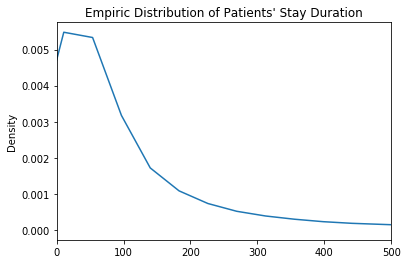

In [107]:
internaciones['Length'].plot.density(xlim=(0,500), title='Empiric Distribution of Patients\' Stay Duration')

Disclaimer: Hospitalization length cannot be computed for patients that are still hospitalized at the time the data pulled. A new variable called 'uptodate_legnth' will be computed to contemplate all cases.

In [47]:
internaciones.columns

Index(['Nro Adm', 'Nro H.C.', 'Edad', 'Sexo', 'Fec Nac', 'Entidad',
       'AgrupEntidad', 'Fec Adm', 'Hora Adm', 'AñoAdm', 'MesAdm',
       'Procedencia', 'Médico Admisión', 'SecAdmisión', 'SecUltimo',
       'CategUlt', 'Aislación', 'HabitUlt', 'CamaUlt', 'Fec Alta', 'Hora Alta',
       'AñoAlta', 'MesAlta', 'Motivo Alta', 'PreAlta', '1erSecInt',
       'Diagnóstico Administrativo No Codificado', 'CodDiagPresu',
       'Diagnóstico Presuntivo', 'CodCieDiagEgr', 'Diagnóstico Egreso',
       'FecDenunEgre', 'HoraDenunEgre', 'Médico Denuncia Egreso', 'Epicrisis',
       'MédicoEpicrisis', 'Quirurg', 'CaderaExpress', 'Permanencia',
       'Servicio Responsable', 'Servicio Co-Responsable', 'FecHorIngGua',
       'Prest.Guardia', 'Prestac.Guardia', 'Reingreso', 'AdmAntReciente',
       'FecAdmAntReciente', 'FecAltaAntReciente', 'SecAntReciente',
       'Diagn. Egreso Admisión Anterior Reciente', 'AmbulanciaEgreso',
       'PesoAlNacer', 'EdadGestac', 'PIM2TEP', 'DiagAltoRiesgoTEP',
       

### 2.2 Main variables description and visualization

For organization purposes, we will divide this section into different groups of variables with similar characteristics:

* `Patients profile`: 'Edad', 'Sexo', 'Entidad', 'AgrupEntidad','PesoAlNacer','EdadGestac',


* `Time features`: 'Fec Adm', 'Hora Adm', 'AñoAdm', 'MesAdm', 'Fec Alta', 'Hora Alta', 'AñoAlta', 'MesAlta', 'PreAlta','FecDenunEgre', 'HoraDenunEgre', 'AdmAntReciente','FecAdmAntReciente', 'FecAltaAntReciente'


* `Diagnosis`:  'Diagnóstico Administrativo No Codificado','CodDiagPresu',Diagnóstico Presuntivo', 'CodCieDiagEgr', 'Diagnóstico Egreso','DiagAltoRiesgoTEP','DiagBajoRiesgoTEP','DiagnósticoDerivación',


* `Servicie`: 'Quirurg', 'Epicrisis','CaderaExpress','Permanencia', 'Length', 'Servicio Responsable','Servicio Co-Responsable','Prest.Guardia','Reingreso','AmbulanciaEgreso', 'SecAdmisión','Aislación'


* `Origin`: 'OrigDerivación','Procedencia','Procedencia.1','AreaDerivación'.


* `Physicians`: 'Médico Admisión','Médico Denuncia Egreso','MédicoEpicrisis'

#### 2.2.1 Patients profile

Data regarding patients' characteristics:

'Edad', 'Sexo', 'Entidad', 'AgrupEntidad','PesoAlNacer','EdadGestac',

`Age (Edad)`

Represents the patient's age. 

There is a clear relationship between this variable and the hospitalization length which tells us that older people are hospitalized for a longer time (as far as they are not too old in which case hospitalization length starts to decrease probably due to sooner death).

In contrast, it doesn't look like there is significant variation in the no. of admission by age as the following graph illustrates, except by newborns (age=0) whose frequency is significantly larger due to the fact that all babies are born in hospitals and they remain the first hours/days after birth hospitalized with their moms. 


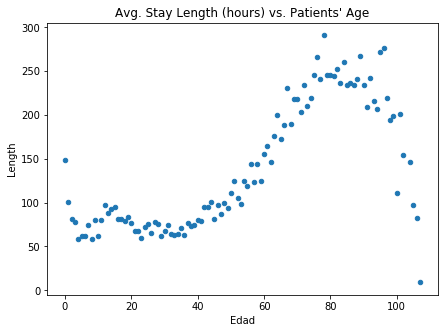

In [93]:
internaciones.groupby(['Edad'], as_index=False).mean().plot.scatter(x='Edad', y='Length', figsize=(7,5), title=
                                                                    'Avg. Stay Length (hours) vs. Patients\' Age' )


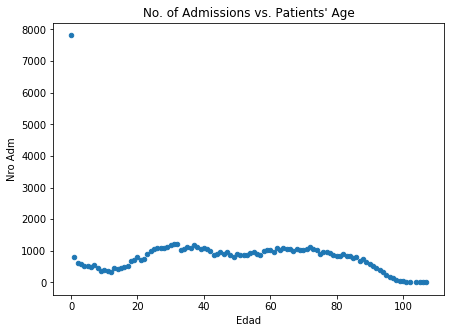

In [94]:
internaciones.groupby(['Edad'], as_index=False).count().plot.scatter(x='Edad', y='Nro Adm', figsize=(7,5), title=
                                                                    'No. of Admissions vs. Patients\' Age' )


`Sex (Sexo)`

/anaconda3/lib/python3.6/site-packages/pandas/core/groupby/groupby.py:3764: FutureWarning: In the future, NAT != NAT will be True rather than False.
  inc = np.r_[1, val[1:] != val[:-1]]


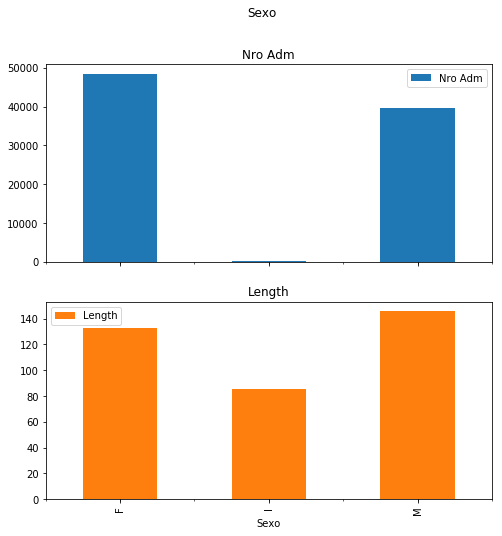

In [131]:
plot_top_categories(internaciones, 'Sexo',3,(8,8),'Sexo')

`Entity (Entidad, AgrupEntidad)`

Entities represent the different medical coverages the Hospital works with. There are 117 available entities ('Entidad') grouped into 7 types ('AgrupEntidad').

No. of admissions differs significantly by entity as well as hospitalization length. 

/anaconda3/lib/python3.6/site-packages/pandas/core/groupby/groupby.py:3764: FutureWarning: In the future, NAT != NAT will be True rather than False.
  inc = np.r_[1, val[1:] != val[:-1]]


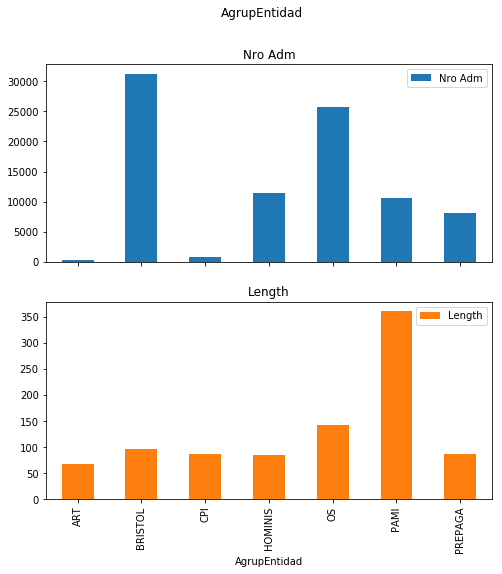

In [132]:
plot_top_categories(internaciones, 'AgrupEntidad',7,(8,8),'AgrupEntidad')

#### 2.2.2 Time features

Time data regarding patient's entry and discharge: 

'Fec Adm', 'Hora Adm', 'AñoAdm', 'MesAdm', 'Fec Alta', 'Hora Alta', 'AñoAlta', 'MesAlta', 'PreAlta','FecDenunEgre', 'HoraDenunEgre', 'AdmAntReciente','FecAdmAntReciente', 'FecAltaAntReciente'

`Hour of the day`

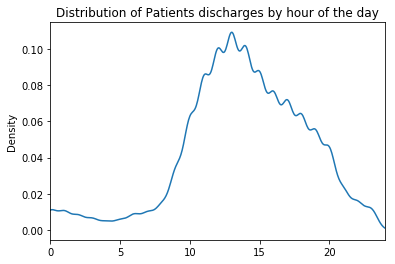

In [95]:
internaciones['Alta_datetime'].dt.hour.plot.density(xlim=(0,24), 
                                                        title='Distribution of Patients discharges by hour of the day')

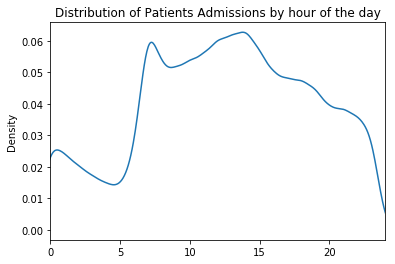

In [96]:
internaciones['Adm_datetime'].dt.hour.plot.density(xlim=(0,24), 
                                                        title='Distribution of Patients Admissions by hour of the day')

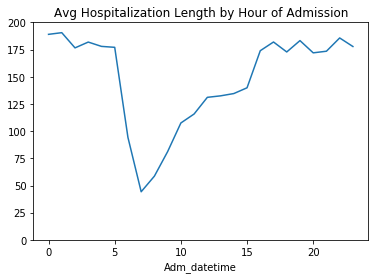

In [97]:
internaciones.groupby(
    internaciones['Adm_datetime'].dt.hour).mean()['Length'].plot.line(
    title='Avg Hospitalization Length by Hour of Admission',
    ylim=(0,200))

As expected, there are almost no activity during the night in terms of patients discharges. In particular, after 8 PM the hospitalized patients outflow decreases dramaticaly. Most discharges ocurred betweem 10 AM and 8 PM, with an ascending trend until noon, and a descending trend after it. 

`Day of the week`

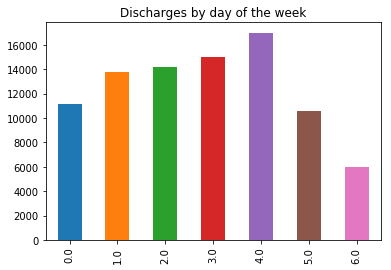

In [133]:
internaciones['Alta_datetime'].dt.weekday.value_counts().sort_index().plot.bar(
    title='Discharges by day of the week')

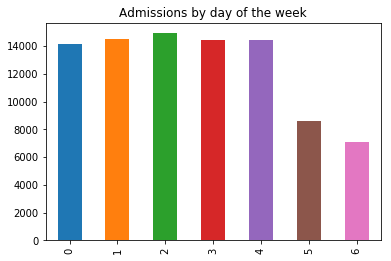

In [134]:
internaciones['Adm_datetime'].dt.weekday.value_counts().sort_index().plot.bar(
    title='Admissions by day of the week')

Similarly, during the weekends (days 5 & 6) there are signicantly less discharges. Monday is still a day low activity in terms of discharges relative to the average weekday (≈ 12.5 K ). The pick is on Fridays when discharges rose 17 K.

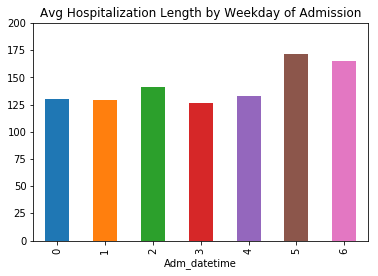

In [135]:
internaciones.groupby(
    internaciones['Adm_datetime'].dt.weekday).mean()['Length'].plot.bar(
    title='Avg Hospitalization Length by Weekday of Admission',
    ylim=(0,200))

Patients who are hospitalized during weekends, have a significantly larger stay at the hospital. There are two hypothesis that may explain this pattern:
* on one hand, it may be that treatment of these patients is delayed due to the fact that they are admitted during the weekend, thus several services are not available and they have to wait until the week starts to be treated.
* one the other hand, it may be that patients being admitted on weekends are more mostly urgent cases with more difficult conditions than patients who have a prearranged hospitalization.

`Hospital activity over time`

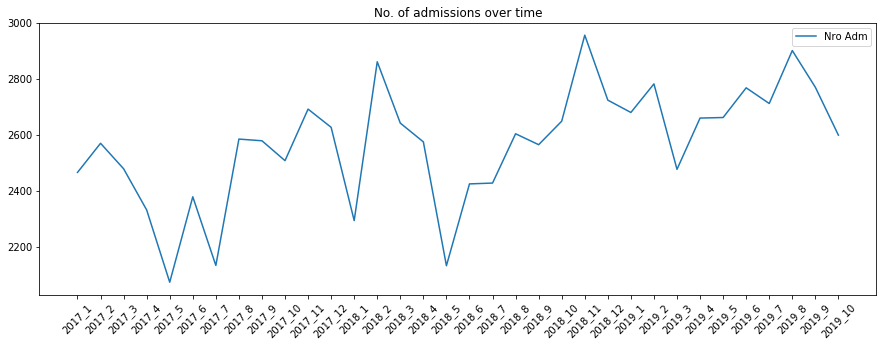

In [101]:
import datetime
internaciones['Adm_year_month'] = internaciones['Adm_datetime'].map(lambda x: str(x.year)+'_'+str(x.month))
labels = internaciones[internaciones['Adm_datetime'].dt.date < datetime.date(2019,11,1)]['Adm_year_month'].unique()

internaciones['Alta_year_month'] = internaciones['Alta_datetime'].map(lambda x: str(x.year)+'_'+str(x.month))

labels2 = internaciones[internaciones['Alta_datetime'].dt.date < datetime.date(2019,11,1)]['Alta_year_month'].unique()

monthly_admissions = internaciones[internaciones['Adm_datetime'].dt.date < datetime.date(2019,11,1)].groupby(
    by= 'Adm_year_month',
    as_index=False)['Nro Adm'].count()

ax = monthly_admissions.plot.line(
                            title='No. of admissions over time',
                            legend=True,
                            figsize=(15,5),
                            xticks=monthly_admissions.index).set_xticklabels(labels,rotation=45)

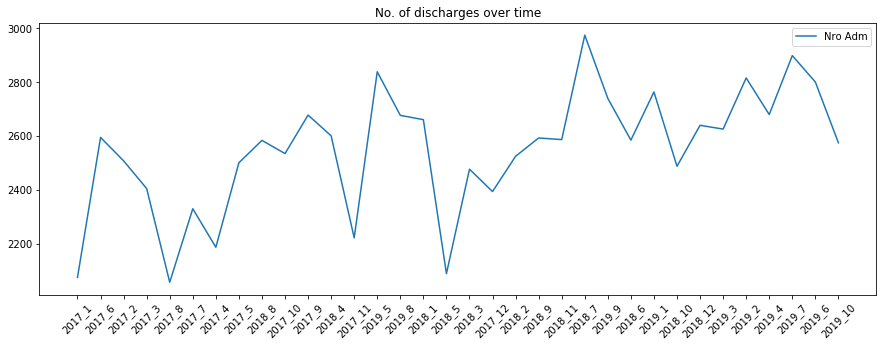

In [102]:
monthly_discharges = internaciones[internaciones['Alta_datetime'].dt.date < datetime.date(2019,11,1)].groupby(
    by= 'Alta_year_month',
    as_index=False)['Nro Adm'].count()
ax2 = monthly_discharges.plot.line(title='No. of discharges over time',
                            legend=True,
                            figsize=(15,5),
                            xticks=monthly_discharges.index).set_xticklabels(labels2,rotation=45)

There is a slightly increasing trend in number of daily admissions over time

This trend is accompanied by a similarly increasing trend in daily number of discharges over time. So as a whole we can say that the hospital is having a higher patients turnover over time.

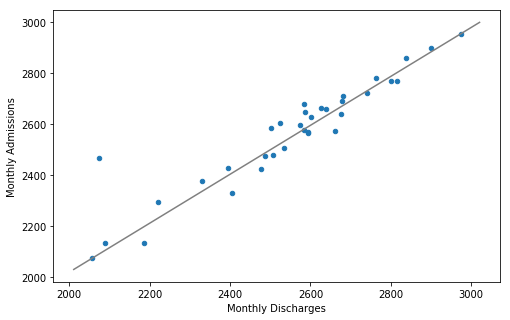

In [47]:
import numpy as np
import matplotlib.pyplot as plt


f, ax = plt.subplots(figsize=(8, 5))

pd.merge(monthly_discharges,monthly_admissions, 
         how='inner',
         left_on='Alta_year_month', 
         right_on = 'Adm_year_month').plot.scatter(x='Nro Adm_x',
                                                   y='Nro Adm_y',
                                                  ax=ax)
ax.set_ylabel('Monthly Admissions')
ax.set_xlabel('Monthly Discharges')


ax.plot(ax.get_xlim(), ax.get_ylim(), ls="-", c=".5")
plt.show()

#### 2.2.3 Diagnosis

Data related to the patient's diagnosis over his hospitalization:

'Diagnóstico Administrativo No Codificado','CodDiagPresu',Diagnóstico Presuntivo', 'CodCieDiagEgr', 'Diagnóstico Egreso','DiagAltoRiesgoTEP','DiagBajoRiesgoTEP','DiagnósticoDerivación',

`DiagnósticoDerivación`

This variable represents .....

Diagnosis in this variable is not codified, the variable has more than 8 K categories. 

The top 50 categories in terms of admissions have been plot below

In [108]:
len(internaciones['DiagnósticoDerivación'].unique())

8061

/anaconda3/lib/python3.6/site-packages/pandas/core/groupby/groupby.py:3764: FutureWarning: In the future, NAT != NAT will be True rather than False.
  inc = np.r_[1, val[1:] != val[:-1]]


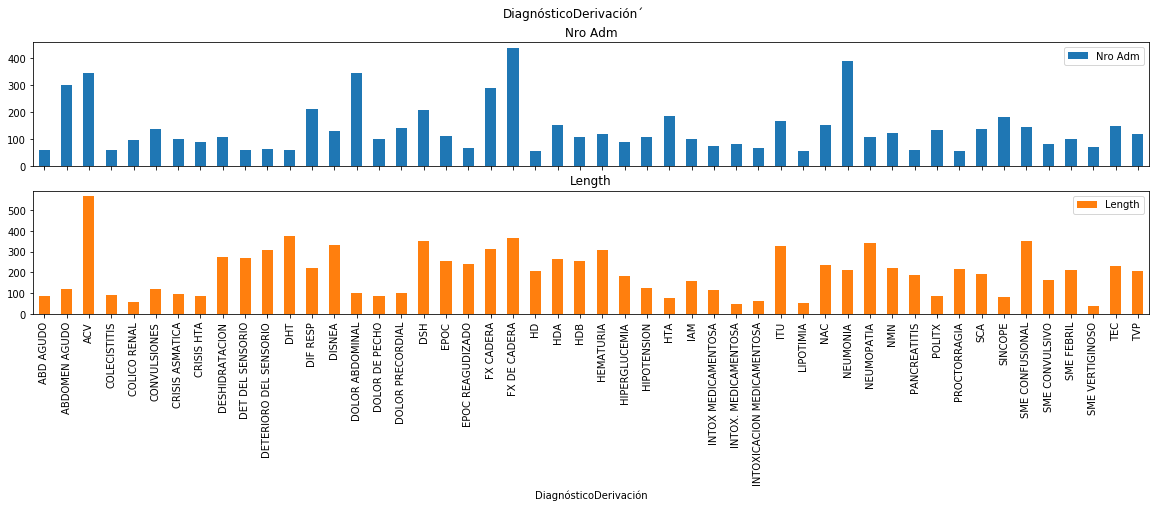

In [136]:
plot_top_categories(internaciones,'DiagnósticoDerivación',50,(20,5), 
                          'DiagnósticoDerivación´')

`DiagnósticoEgreso`

This variable represents .....

Diagnosis in this variable is not codified either, the variable has almost 6 K categories.

The top 50 categories in terms of admissions have been plot below.

In [109]:
len(internaciones['Diagnóstico Egreso'].unique())

5794

/anaconda3/lib/python3.6/site-packages/pandas/core/groupby/groupby.py:3764: FutureWarning: In the future, NAT != NAT will be True rather than False.
  inc = np.r_[1, val[1:] != val[:-1]]


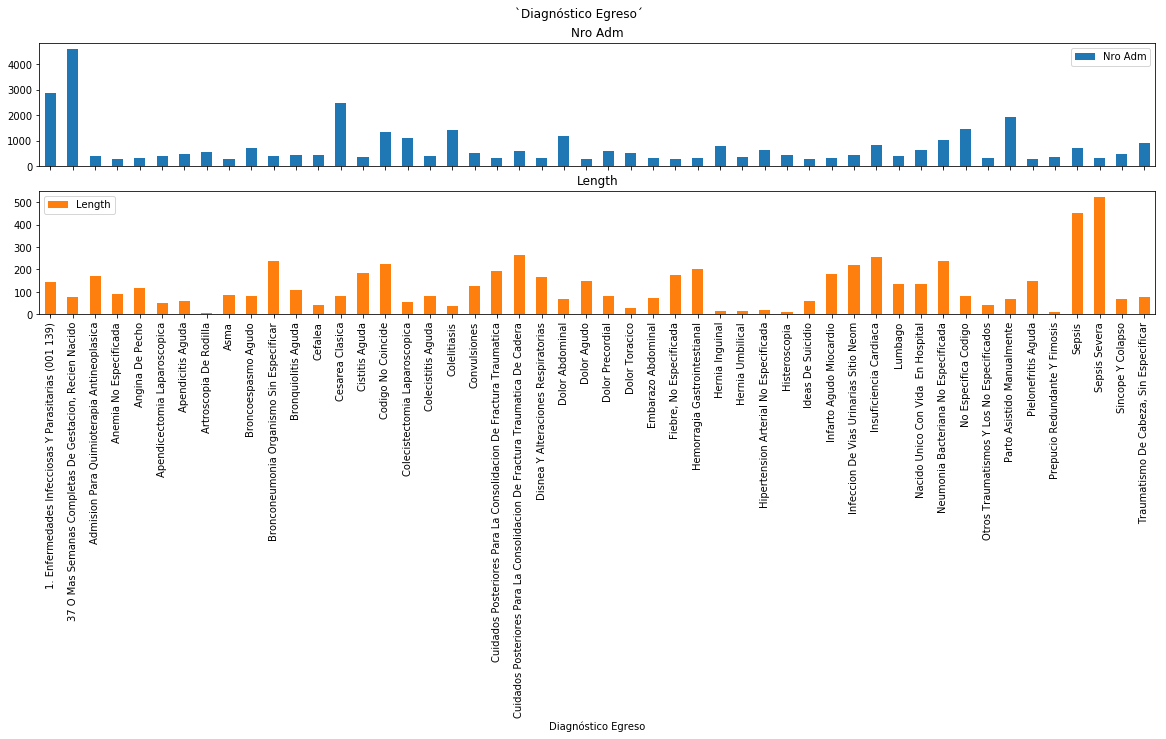

In [138]:
plot_top_categories(internaciones,'Diagnóstico Egreso',50,(20,5), 
                          '`Diagnóstico Egreso´')

In [112]:
len(internaciones['Diagnóstico Administrativo No Codificado'].unique())

20934

#### 2.2.4 Service


Variables related to the characteristics of the services/treatments received by the patient during his hospitalizacion:

'Quirurg', 'Epicrisis','CaderaExpress','Permanencia', 'Length', 'Servicio Responsable','Servicio Co-Responsable','Prest.Guardia','Reingreso','AmbulanciaEgreso', 'SecAdmisión','Aislación'

`Quirurg`

Indicates whether the patient in consideration underwent a surgery during the hospitalization or not. 'No' is the mode, eventhough the distribution is more or less balanced. Hospitalization duration tends to be larger for patients who have been subjected to a surgery.

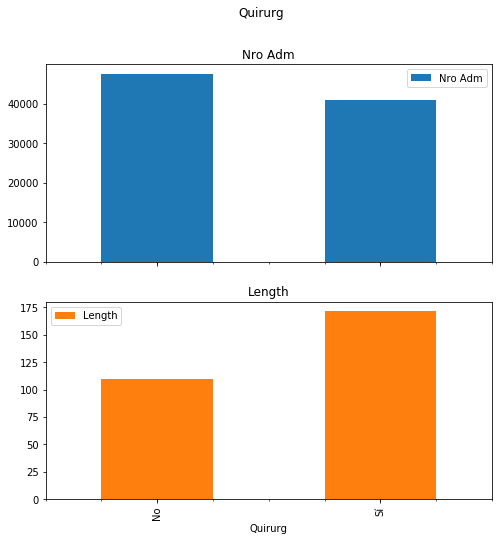

In [146]:
plot_top_categories(internaciones, 'Quirurg',2,(8,8),'Quirurg')

`Servicio responsable`

Indicates the hospital sector in charge of the patient hospitalization. There are 62 possible values for this variable.

In [140]:
internaciones['Servicio Responsable'].value_counts()

CLINICA MEDICA                             21882
CIRUGIA GENERAL ADULTOS                     7683
OBSTETRICIA                                 7270
ORTOPEDIA Y TRAUMATOLOGIA                   6953
NEONATOLOGIA                                3900
GINECOLOGIA                                 2837
UROLOGIA                                    2007
CARDIOLOGIA ADULTOS                         1865
PEDIATRIA                                   1178
OTORRINOLARINGOLOGIA                        1094
CIRUGIA HIGADO VIAS BILIARES Y PANCREAS      916
CIRUGIA DE PAREDES ABDOMINALES               649
CIRUGIA PLASTICA Y REPARADORA                521
CIRUGIA DE COLON, RECTO Y ANO                493
UNIDAD CORONARIA                             377
GASTROENTEROLOGIA Y HEPATOLOGIA ADULTOS      369
UNIDAD DE CUIDADOS INTENSIVOS                327
HEMOTERAPIA                                  299
NEUROCIRUGIA                                 280
HEMATOLOGIA                                  261
CIRUGIA TORACICA    

/anaconda3/lib/python3.6/site-packages/pandas/core/groupby/groupby.py:3764: FutureWarning: In the future, NAT != NAT will be True rather than False.
  inc = np.r_[1, val[1:] != val[:-1]]


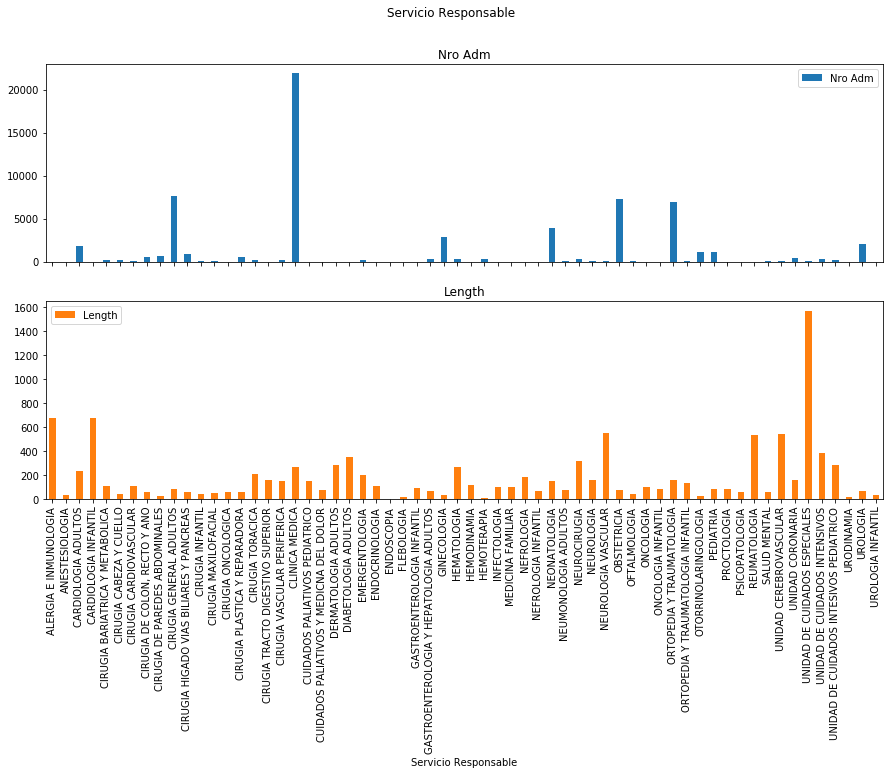

In [142]:
plot_top_categories(internaciones, 'Servicio Responsable',62,(15,8),'Servicio Responsable')

`CaderaExpress`

This variable reflect whether or not the patient has received a hip express surgery. Most patients hospitalized haven't. However having received this type or surgery seems like a good predictor of a longer stay at the hospital.

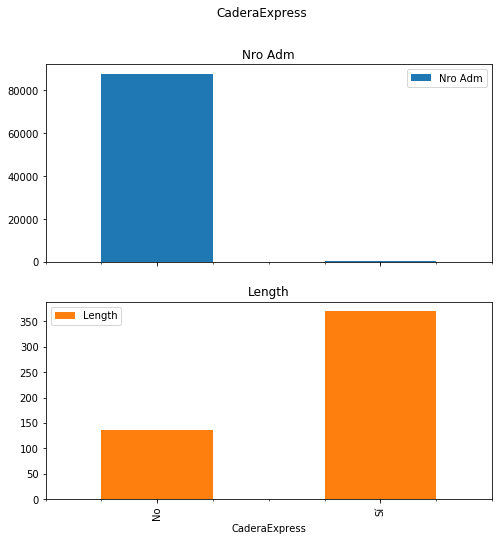

In [147]:
plot_top_categories(internaciones, 'CaderaExpress',2,(8,8),'CaderaExpress')

#### 2.2.5 Origin

Variables related to where does the patient hospitalization comes from:

'OrigDerivación','Procedencia','Procedencia.1','AreaDerivación'.

`Procedencia`

Indicates the source of the patient hospitalized.
There are five possibles origins: 
* AMB Urgente: patients coming from ......
* Derivacion: patients that were derived to be hospitalized either from other medical center or some of the hospital areas.
* Emergencias: patients coming from emergency services.
* Guardia: patients that came to the medical guard service and were hospitalized
* Programada: these are scheduled hospitalizations. 

No. of admissions and hospitalization duration vary significantly within the different sources.

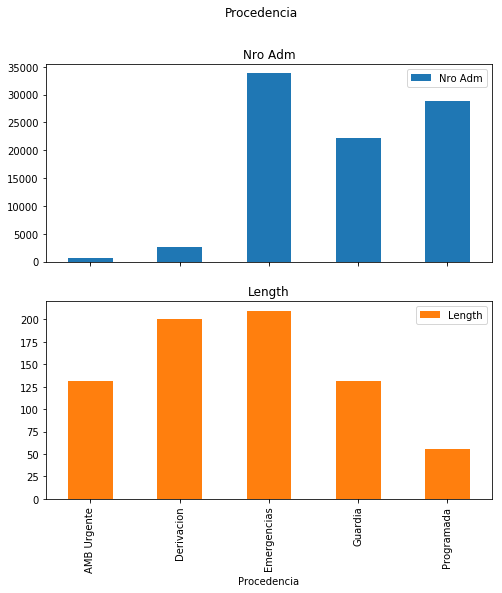

In [150]:
plot_top_categories(internaciones, 'Procedencia',5,(8,8),'Procedencia')

`OrigDerivación`

The variable 'OrigDerivación' represents ......

This variable is not encoded and contains more than 3K categories, most of them corresponding to physicist names. Top 50 categories are plotted below

In [50]:
len(internaciones['OrigDerivación'].unique())

3328

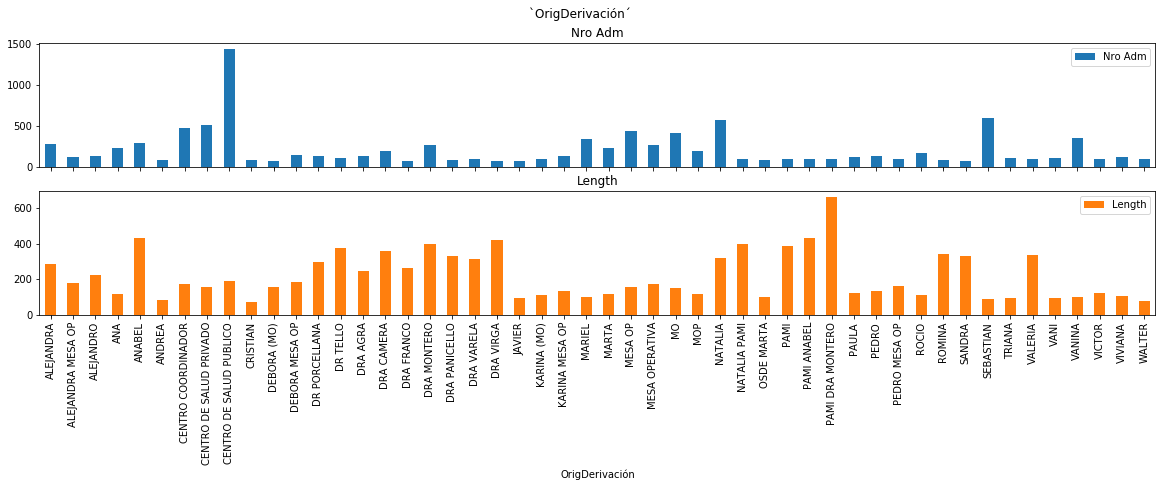

In [151]:
plot_top_categories(internaciones,'OrigDerivación',50,(20,5), '`OrigDerivación´' )

`AreaDerivación`

Represent which sector of the hospital has indicated the patient's hospitalization. There are 9 available values for this variable.
Most hospitalizations come from the category `INTERNACION GENERAL`. There is great variation in hospitalization duration between different values of this variable

In [53]:
len(internaciones['AreaDerivación'].unique())

9

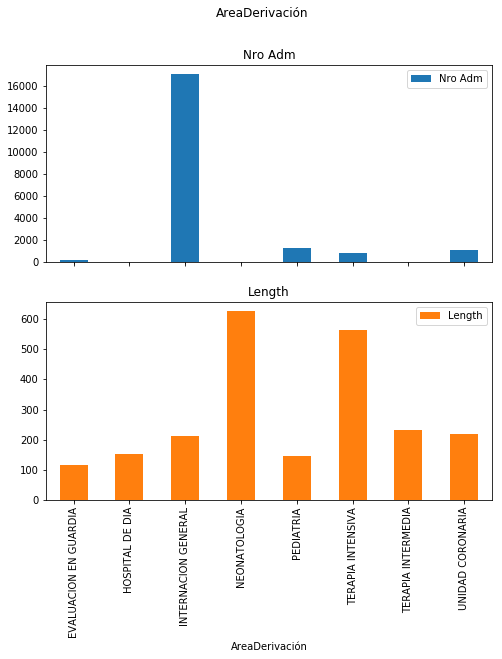

In [152]:
plot_top_categories(internaciones, 'AreaDerivación',8,(8,8),'AreaDerivación')

#### 2.2.6 Physicians

Info about the hospital professional that were in charge of the patient during his hospitalization:

Médico Admisión','Médico Denuncia Egreso','MédicoEpicrisis'

Besides including these categorical variables as they are (which may or may not make sense), we'll build features representing each physician characteritics by crossing this data with the physicians dataset provided by the Hospital management team (with data regarding, for example, the professional specialization, his age, etc) and the historic performance of each physician (like the avg. hospitalization duration of his past patients).

`Médico Admisión `

In [158]:
len(internaciones['Médico Admisión'].value_counts())

1685

In [ ]:
internaciones['Médico Admisión'].value_counts()

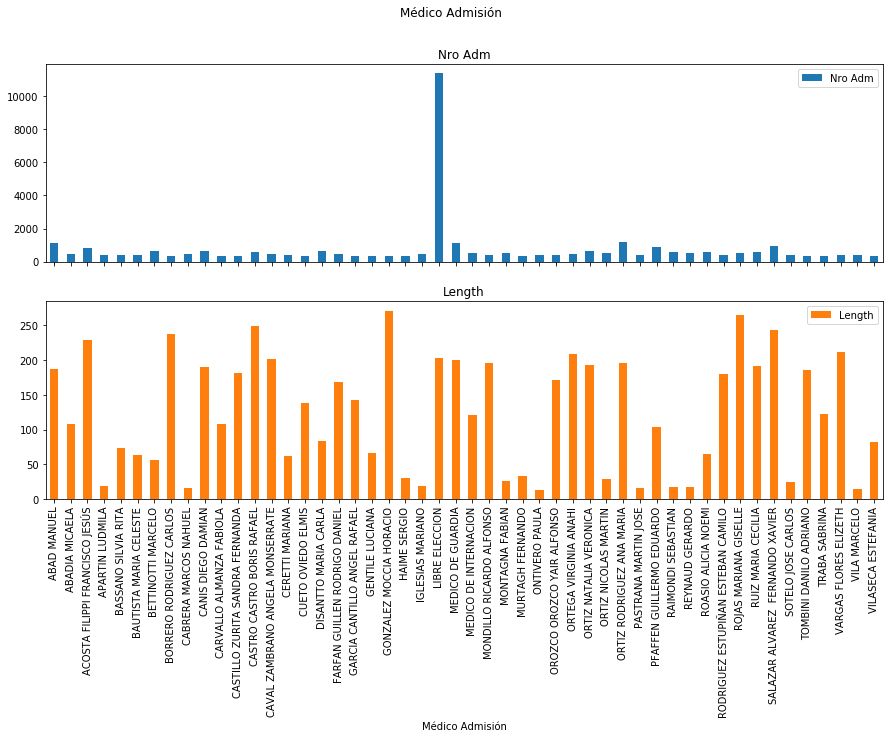

In [165]:
plot_top_categories(internaciones, 'Médico Admisión',50,(15,8),'Médico Admisión')

`Médico Denuncia Egreso`

In [155]:
len(internaciones['Médico Denuncia Egreso'].value_counts())

811

plot_top_categories(internaciones, 'Médico Denuncia Egreso',50,(15,8),'Médico Denuncia Egreso')

`Médico Epicrisis`

In [156]:
len(internaciones['MédicoEpicrisis'].value_counts())

766

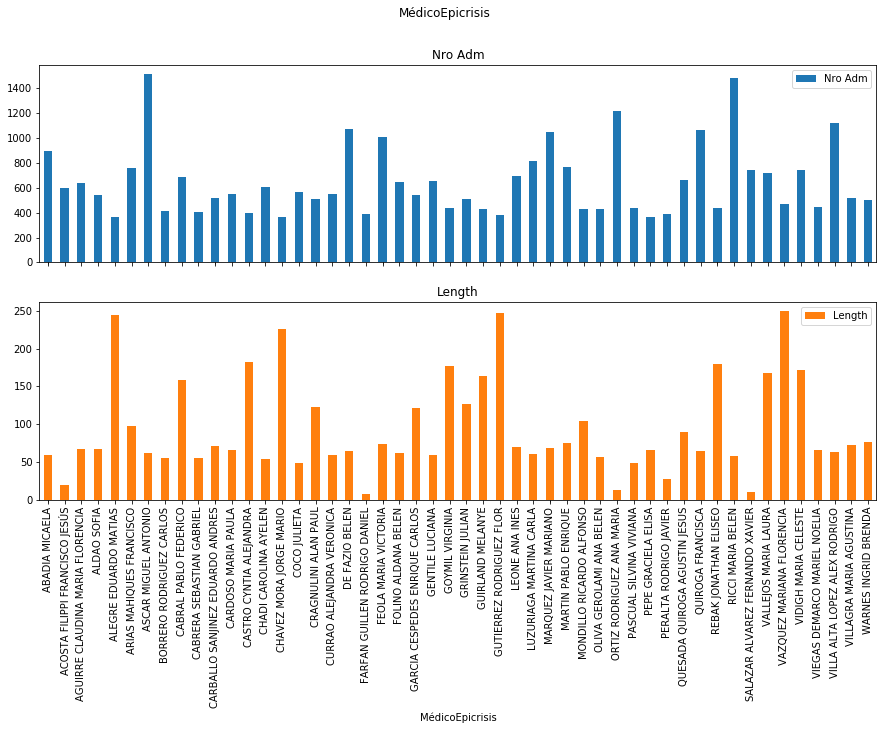

In [167]:
plot_top_categories(internaciones, 'MédicoEpicrisis',50,(15,8),'MédicoEpicrisis')

## 3) Images df

This dataset contains information regarding the images analysis requested by physicians for the hospital's patients.

Each image study is linked to a clinic history id and a date. These two variables will let us cross images data with the hospitalizations data in order to know what kind of studies were required and when during the patient hospitalization. 

##### Sample view of the 'images' df

In [173]:
images = db['images']
images.head()

,Nro Vale,Pun,Estado,Fecha,Hora,HH,AñoMes,Sector,Nro Adm,HistClín,Fec.Adm.,Fec.Alta,Entidad,Nombre Entidad,GrupoEnt,Urgencia,Mnemo Serv,Servicio,Cod Serv,Nombre del Solicitante,Función del Solicitante,Prestación,Descrip Prestación,CantPrest,Cod Insumo,Descrip Insumo,CantInsumos,Observ.Estudio
0,35455089,35454865,3,2017-01-01,03:20:00,3,2017-Ene,EME,466471-4,3714597-2,2017-01-01,2017-01-07,876,PAMI UGL VI,PAMI,1,RX,RAYOS,7100,VEDIA ANICETA,MEDICO DE PISO,34090503,RX C/PORTATIL DE TORAX,1,NaN,NaN,NaN,NaN
1,35455101,35454877,3,2017-01-01,03:34:00,3,2017-Ene,EME,466470-1,3526141-4,2017-01-01,2017-01-04,876,PAMI UGL VI,PAMI,1,RX,RAYOS,7100,VEDIA ANICETA,MEDICO DE PISO,34090503,RX C/PORTATIL DE TORAX,1,NaN,NaN,NaN,NaN
2,35455130,35454906,3,2017-01-01,04:26:00,4,2017-Ene,EME,466471-4,3714597-2,2017-01-01,2017-01-07,876,PAMI UGL VI,PAMI,0,RX,RAYOS,7100,DENNER GERMAN,MEDICO DE PISO,34090503,RX C/PORTATIL DE TORAX,1,NaN,NaN,NaN,NaN
3,35455135,35454911,3,2017-01-01,04:31:00,4,2017-Ene,EME,466473-0,3672378-8,2017-01-01,2017-01-04,948,OSUTHGRA O.S PERSONAL GASTRONOMICO,BRISTOL,1,RX,RAYOS,7100,CANIS DIEGO,MEDICO DE UCI,34042103,"ABDOMEN FRENTE, DE PIE Y ACOSTADO. RX DE",1,NaN,NaN,NaN,NaN
4,35455135,35454911,3,2017-01-01,04:31:00,4,2017-Ene,EME,466473-0,3672378-8,2017-01-01,2017-01-04,948,OSUTHGRA O.S PERSONAL GASTRONOMICO,BRISTOL,1,RX,RAYOS,7100,CANIS DIEGO,MEDICO DE UCI,34090503,RX C/PORTATIL DE TORAX,1,NaN,NaN,NaN,NaN


##### Available variables


In [169]:
for i in images.columns:
    print(i)

Nro Vale
Pun
Estado
Fecha
Hora
HH
AñoMes
Sector
Nro Adm
HistClín
Fec.Adm.
Fec.Alta
Entidad
Nombre Entidad
GrupoEnt
Urgencia
Mnemo Serv
Servicio
Cod Serv
Nombre del Solicitante
Función del Solicitante
Prestación
Descrip Prestación
CantPrest
Cod Insumo
Descrip Insumo
CantInsumos
Observ.Estudio


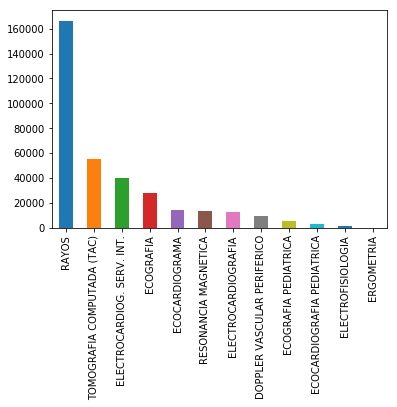

In [269]:
images.Servicio.value_counts().plot.bar()

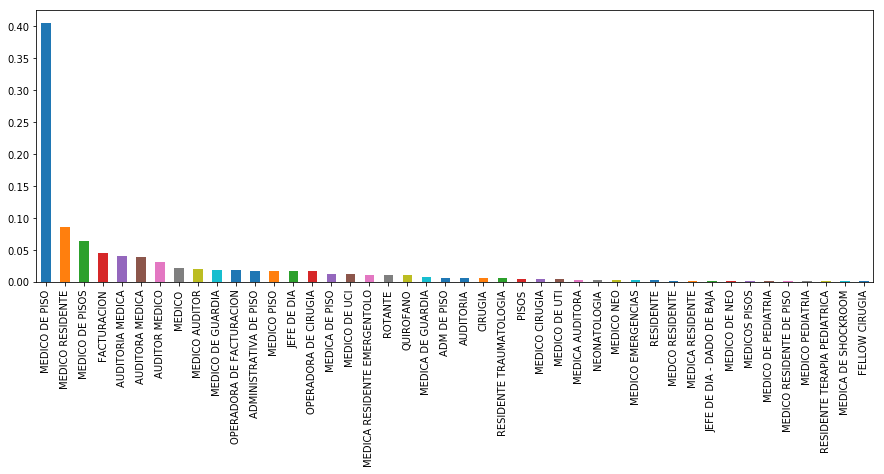

In [285]:
images['Función del Solicitante'].value_counts(True)[:-80].plot.bar(figsize=(15,5))

In [287]:
images['Estado'].value_counts()

3     327655
2      22745
11         3
Name: Estado, dtype: int64

In [179]:
import numpy as np

##### Average no. of images studies per hospitalization

In [190]:
np.mean(images.groupby(by='Nro Adm')['Nro Adm'].count())

6.672690571858397

In [191]:
np.mean(images.groupby(by='HistClín')['HistClín'].count())

8.88625989044431

In [ ]:
np.mean(images.groupby(by='HistClín')['Nro Adm'].count())

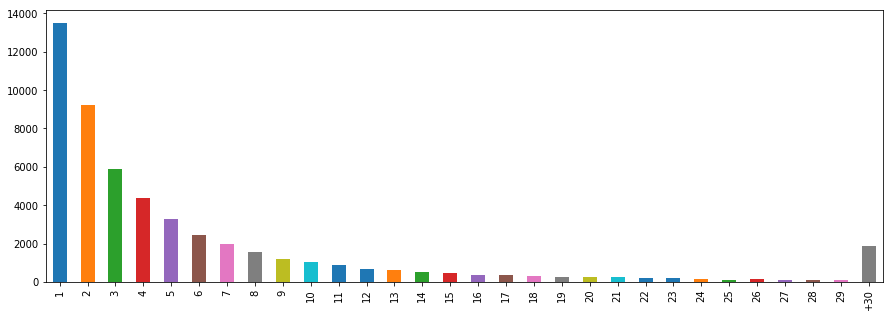

In [258]:
images.groupby(by='Nro Adm').count()['Fec.Adm.'].apply(lambda x: '+30' if x >= 30 else x).value_counts(sort=False).plot.bar(figsize=(15,5))

#Disclaimer: this graph does not consider patients who have 0 images requested.

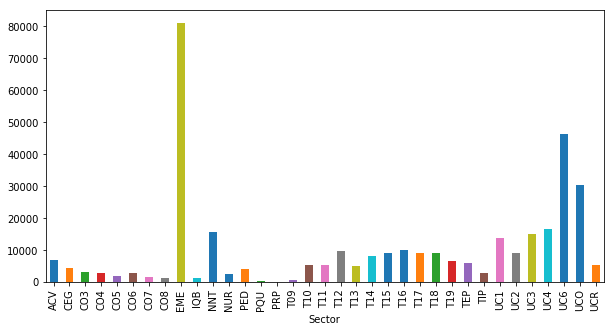

In [265]:
images.groupby(by='Sector').count()['Fec.Adm.'].plot.bar(figsize=(10,5))

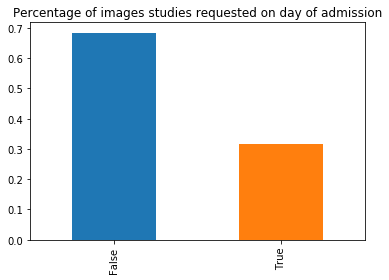

In [297]:
(images['Fecha'] == images['Fec.Adm.']).value_counts(True).plot.bar(title='Percentage of images studies requested on day of admission')

In [367]:
images ['Lag_admission_image_request'] = (pd.to_datetime(images['Fecha'])-pd.to_datetime(images['Fec.Adm.'])).dt.days

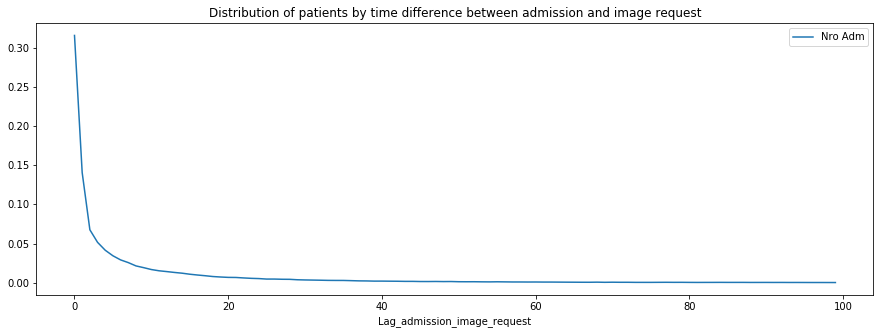

In [375]:
(images.groupby('Lag_admission_image_request').agg({'Nro Adm': 'count'})/len(images)).head(100).plot(figsize=(15,5),
                                title = 'Distribution of patients by time difference between admission and image request')

## 4) Laboratory analysis df 

In [376]:
labos = db['labos']
labos.head()

,Nro Vale,Pun,Estado,Fecha,Hora,HH,AñoMes,Sector,Nro Adm,HistClín,Nombre Paciente,Fec.Adm.,Fec.Alta,Entidad,Nombre Entidad,Nro.Afiliado,GrupoEnt,Urgencia,Mnemo Serv,Servicio,Cod Serv,Nombre del Solicitante,Función del Solicitante,Prestación,Descrip Prestación,CantPrest,Cod Insumo,Descrip Insumo,CantInsumos,EstadoResultado,Observ.Estudio
0,35455087,35454863,3,01/01/2017,03:20:00,3,2017-Ene,EME,466471-4,3714597-2,"HIDALGO,MARIA ANGELICA",01/01/2017,07/01/2017,876,PAMI UGL VI,15048873600400,PAMI,1,LA,LABORATORIO,7000,VEDIA ANICETA,MEDICO DE PISO,171,COAGULOGRAMA BASICO,1,NaN,NaN,NaN,NaN,NaN
1,35455087,35454863,3,01/01/2017,03:20:00,3,2017-Ene,EME,466471-4,3714597-2,"HIDALGO,MARIA ANGELICA",01/01/2017,07/01/2017,876,PAMI UGL VI,15048873600400,PAMI,1,LA,LABORATORIO,7000,VEDIA ANICETA,MEDICO DE PISO,190,CPK,1,NaN,NaN,NaN,NaN,NaN
2,35455087,35454863,3,01/01/2017,03:20:00,3,2017-Ene,EME,466471-4,3714597-2,"HIDALGO,MARIA ANGELICA",01/01/2017,07/01/2017,876,PAMI UGL VI,15048873600400,PAMI,1,LA,LABORATORIO,7000,VEDIA ANICETA,MEDICO DE PISO,412,GLUCOSA EN SANGRE,1,NaN,NaN,NaN,NaN,NaN
3,35455087,35454863,3,01/01/2017,03:20:00,3,2017-Ene,EME,466471-4,3714597-2,"HIDALGO,MARIA ANGELICA",01/01/2017,07/01/2017,876,PAMI UGL VI,15048873600400,PAMI,1,LA,LABORATORIO,7000,VEDIA ANICETA,MEDICO DE PISO,475,HEMOGRAMA,1,NaN,NaN,NaN,NaN,NaN
4,35455087,35454863,3,01/01/2017,03:20:00,3,2017-Ene,EME,466471-4,3714597-2,"HIDALGO,MARIA ANGELICA",01/01/2017,07/01/2017,876,PAMI UGL VI,15048873600400,PAMI,1,LA,LABORATORIO,7000,VEDIA ANICETA,MEDICO DE PISO,481,HEPATOGRAMA,1,NaN,NaN,NaN,NaN,NaN


In [172]:
for i in labos.columns:
    print(i)

Nro Vale
Pun
Estado
Fecha
Hora
HH
AñoMes
Sector
Nro Adm
HistClín
Nombre Paciente
Fec.Adm.
Fec.Alta
Entidad
Nombre Entidad
Nro.Afiliado
GrupoEnt
Urgencia
Mnemo Serv
Servicio
Cod Serv
Nombre del Solicitante
Función del Solicitante
Prestación
Descrip Prestación
CantPrest
Cod Insumo
Descrip Insumo
CantInsumos
EstadoResultado
Observ.Estudio


In [380]:
len(labos['Descrip Prestación'].value_counts())

691

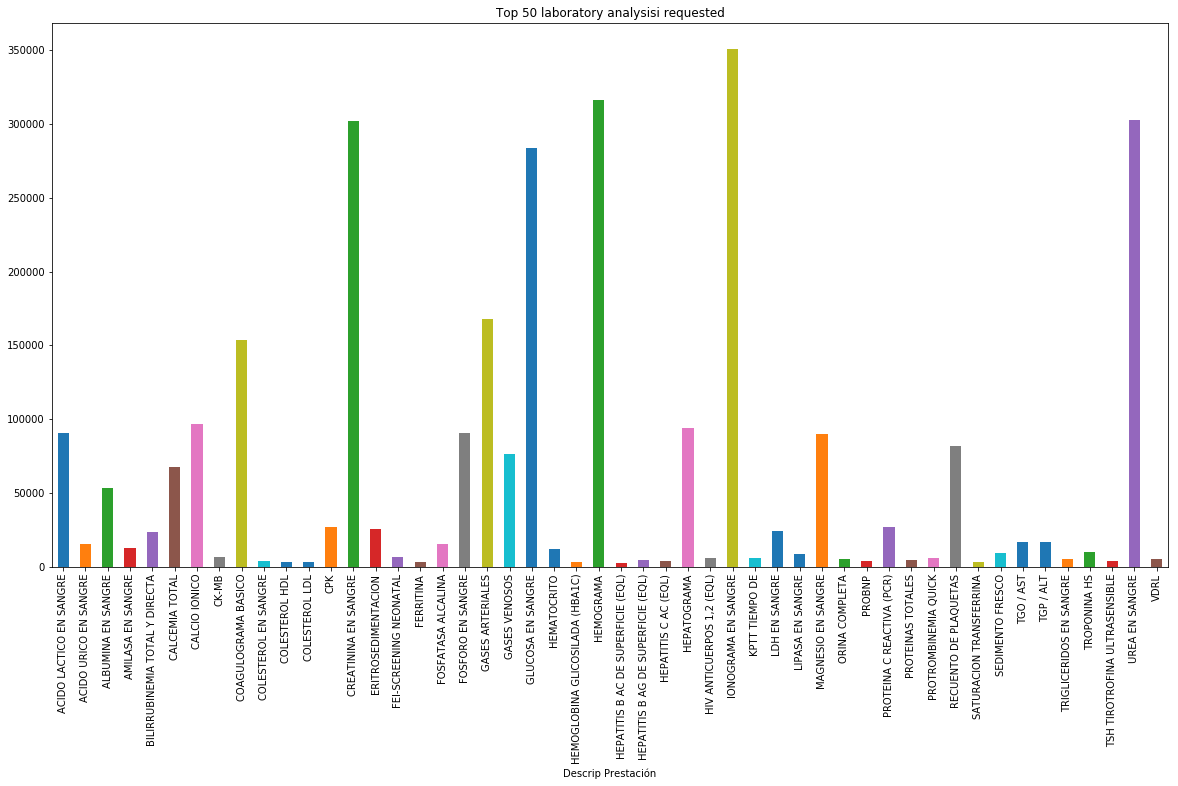

In [384]:
plot_top_categories_count(labos,'Descrip Prestación',50,figsize=(20,10), title='Top 50 laboratory analysisi requested')

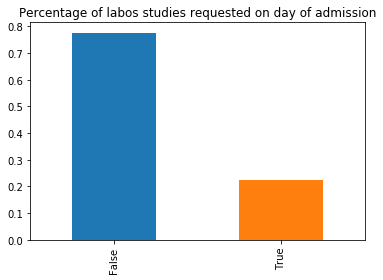

In [377]:
(labos['Fecha'] == labos['Fec.Adm.']).value_counts(True).plot.bar(title='Percentage of labos studies requested on day of admission')



In contrast with images, laboratory analysis are not usually requested during the first day of admission.

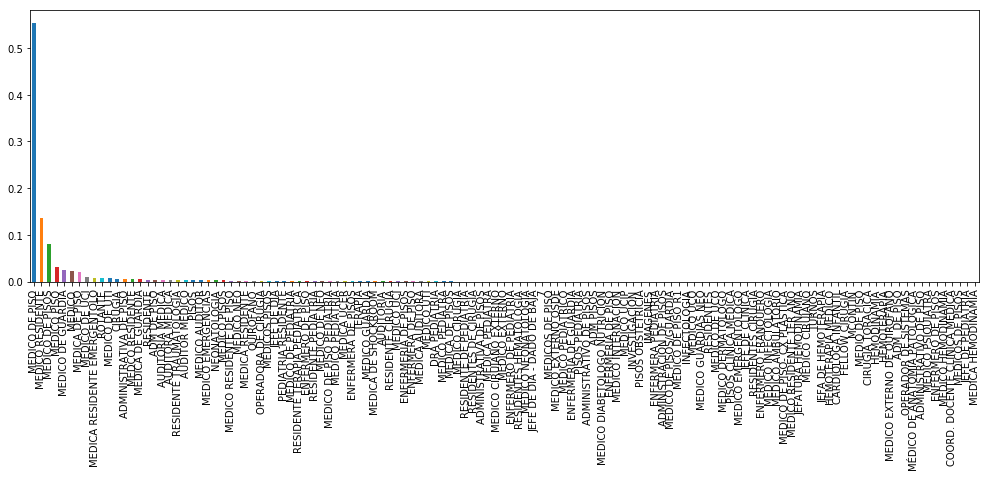

In [388]:
labos['Función del Solicitante'].value_counts(True).plot.bar(figsize=(17,5))

In [389]:
np.mean(labos.groupby(by='Nro Adm')['Nro Adm'].count())

47.3783717395643

In [390]:
np.mean(labos.groupby(by='HistClín')['HistClín'].count())

63.51798872103075